# Lesson 14: linear regression - MTCARS DATASET
- Source: The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
- URL: https://rdrr.io/r/datasets/mtcars.html
- Date: 05/12/24
- Goal: Create a basic prediction model and a feature explainer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging # crea una bitacora de incidencias de nuestro script
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, MinMaxScaler
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error
)
from sklearn.inspection import permutation_importance
#from sklearn.impute import SimpleImputer
logger = logging.getLogger()
logger.setLevel(logging.INFO) 

### 1. Data loading

Objective: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
data = {
    'mpg': [21, 21, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26, 30.4, 15.8, 19.7, 15, 21.4],
    'cyl': [6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8, 8, 8, 8, 4, 4, 4, 8, 6, 8, 4],
    'disp': [160, 160, 108, 258, 360, 225, 360, 146.7, 140.8, 167.6, 167.6, 275.8, 275.8, 275.8, 472, 460, 440, 78.7, 75.7, 71.1, 120.1, 318, 304, 350, 400, 79, 120.3, 95.1, 351, 145, 301, 121],
    'hp': [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109],
    'drat': [3.9, 3.9, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3.92, 3.07, 3.07, 3.07, 2.93, 3, 3.23, 4.08, 4.93, 4.22, 3.7, 2.76, 3.15, 3.73, 3.08, 4.08, 4.43, 3.77, 4.22, 3.62, 3.54, 4.11],
    'wt': [2.62, 2.875, 2.32, 3.215, 3.44, 3.46, 3.57, 3.19, 3.15, 3.44, 3.44, 4.07, 3.73, 3.78, 5.25, 5.424, 5.345, 2.2, 1.615, 1.835, 2.465, 3.52, 3.435, 3.84, 3.845, 1.935, 2.14, 1.513, 3.17, 2.77, 3.57, 2.78],
    'qsec': [16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20, 22.9, 18.3, 18.9, 17.4, 17.6, 18, 17.98, 17.82, 17.42, 19.47, 18.52, 19.9, 20.01, 16.87, 17.3, 15.41, 17.05, 18.9, 16.7, 16.9, 14.5, 15.5, 14.6, 18.6],
    'vs': [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    'am': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    'gear': [4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 4],
    'carb': [4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1, 2, 2, 4, 2, 1, 2, 2, 4, 6, 8, 2],
    'wtdip': [419.2, 460, 250.56, 829.47, 1238.4, 778.5, 1285.2, 467.973, 443.52, 576.544, 576.544, 1122.506, 1028.734, 1042.524, 2478, 2495.04, 2351.8, 173.14, 122.2555, 130.4685, 296.0465, 1119.36, 1044.24, 1344, 1538, 152.865, 257.442, 143.8863, 1112.67, 401.65, 1074.57, 336.38]
}

df_raw = pd.DataFrame(data, index= ["Mazda RX4", "Mazda RX4 Wag", "Datsun 710", "Hornet 4 Drive", "Hornet Sportabout", "Valiant", "Duster 360",
                                    "Merc 240D", "Merc 230", "Merc 280", "Merc 280C", "Merc 450SE", "Merc 450SL", "Merc 450SLC", "Cadillac Fleetwood", "Lincoln Continental", "Chrysler Imperial", "Fiat 128", "Honda Civic", "Toyota Corolla", "Toyota Corona", "Dodge Challenger",
                                    "AMC Javelin", "Camaro Z28", "Pontiac Firebird", "Fiat X1-9", "Porsche 914-2", "Lotus Europa", "Ford Pantera L", "Ferrari Dino", "Maserati Bora", "Volvo 142E"]
)

df_raw.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
 11  wtdip   32 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 3.2+ KB


In [3]:
df_raw.sample(10, random_state = 2025)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wtdip
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,173.1400
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,250.5600
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,296.0465
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1285.2000
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,576.5440
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,1122.5060
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,2495.0400
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,401.6500
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,1042.5240
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,257.4420


|Name|Description|Type|
|----|-----------|----|
|mpg|Miles/(US) gallon|float|
|cyl|Number of cylinders|float|
|disp|Displacement (cu.in.)|float|
|hp|Gross horsepower|int|
|drat|Rear axle ratio|float|
|wt|Weight (1000 lbs)|float|
|qsec|1/4 mile time|float|
|vs|Engine (0 = V-shaped, 1 = straight)|int|
|am|Transmission (0 = automatic, 1 = manual)|int|
|gear|Number of forward gears|int|

### 2. Data preprocessing

Objectives: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [4]:
df_baking = df_raw.copy()
df_baking['vs'] = df_baking['vs'].map({0: 'v_shaped', 1: 'straight'})
df_baking['am'] = df_baking['am'].map({0: 'at', 1: 'man'})
df_baking['vs'] = df_baking['vs'].astype('category')
df_baking['am'] = df_baking['am'].astype('category')
#cyl, gear, carb

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mpg     32 non-null     float64 
 1   cyl     32 non-null     int64   
 2   disp    32 non-null     float64 
 3   hp      32 non-null     int64   
 4   drat    32 non-null     float64 
 5   wt      32 non-null     float64 
 6   qsec    32 non-null     float64 
 7   vs      32 non-null     category
 8   am      32 non-null     category
 9   gear    32 non-null     int64   
 10  carb    32 non-null     int64   
 11  wtdip   32 non-null     float64 
dtypes: category(2), float64(6), int64(4)
memory usage: 3.1+ KB


In [5]:
df_train, df_test = train_test_split(df, random_state=2025, test_size=0.1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Merc 280 to Maserati Bora
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mpg     28 non-null     float64 
 1   cyl     28 non-null     int64   
 2   disp    28 non-null     float64 
 3   hp      28 non-null     int64   
 4   drat    28 non-null     float64 
 5   wt      28 non-null     float64 
 6   qsec    28 non-null     float64 
 7   vs      28 non-null     category
 8   am      28 non-null     category
 9   gear    28 non-null     int64   
 10  carb    28 non-null     int64   
 11  wtdip   28 non-null     float64 
dtypes: category(2), float64(6), int64(4)
memory usage: 2.7+ KB


In [6]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
mpg,28.0,19.710714,5.861446,10.4000,15.4250,18.9500,21.7500,33.900
cyl,28.0,6.357143,1.725930,4.0000,4.0000,6.0000,8.0000,8.000
disp,28.0,239.867857,122.734474,71.1000,143.9500,241.5000,326.0000,472.000
hp,28.0,149.750000,67.751520,52.0000,108.0000,136.5000,180.0000,335.000
drat,28.0,3.580357,0.557670,2.7600,3.0775,3.6550,3.9200,4.930
wt,28.0,3.299893,0.999210,1.5130,2.7775,3.4375,3.7425,5.424
qsec,28.0,17.758214,1.793451,14.5000,16.8925,17.5100,18.6750,22.900
gear,28.0,3.714286,0.762896,3.0000,3.0000,4.0000,4.0000,5.000
carb,28.0,2.964286,1.598197,1.0000,2.0000,2.5000,4.0000,8.000
wtdip,28.0,895.947939,678.939136,122.2555,414.8125,803.9850,1120.1465,2495.040


,count,unique,top,freq
vs,28,2,v_shaped,17
am,28,2,at,17


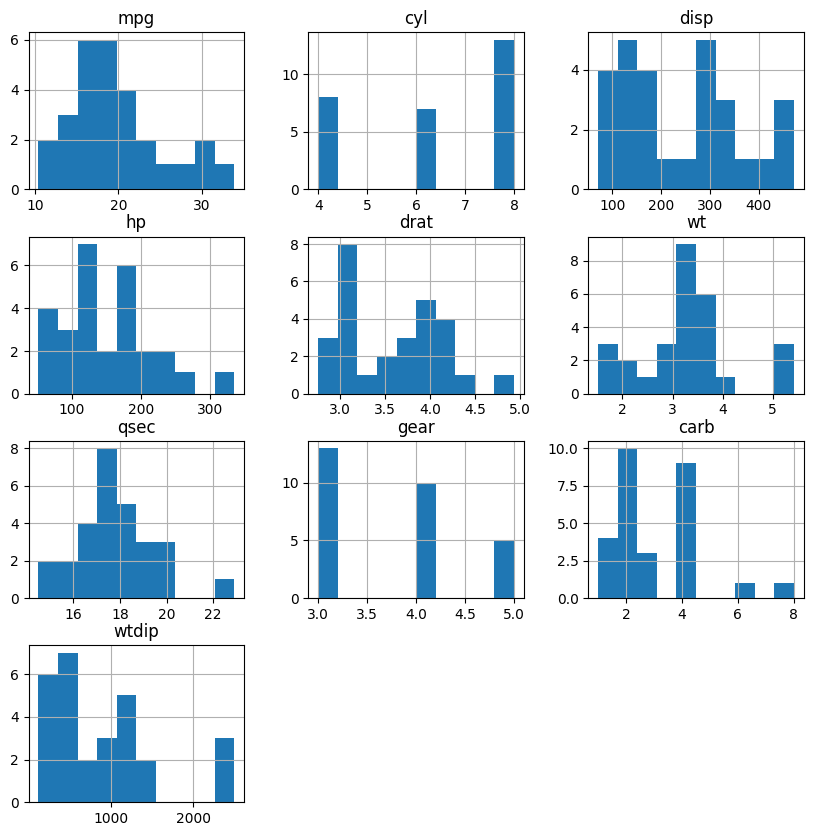

In [7]:
df_train.hist(figsize=(10,10))
plt.show()

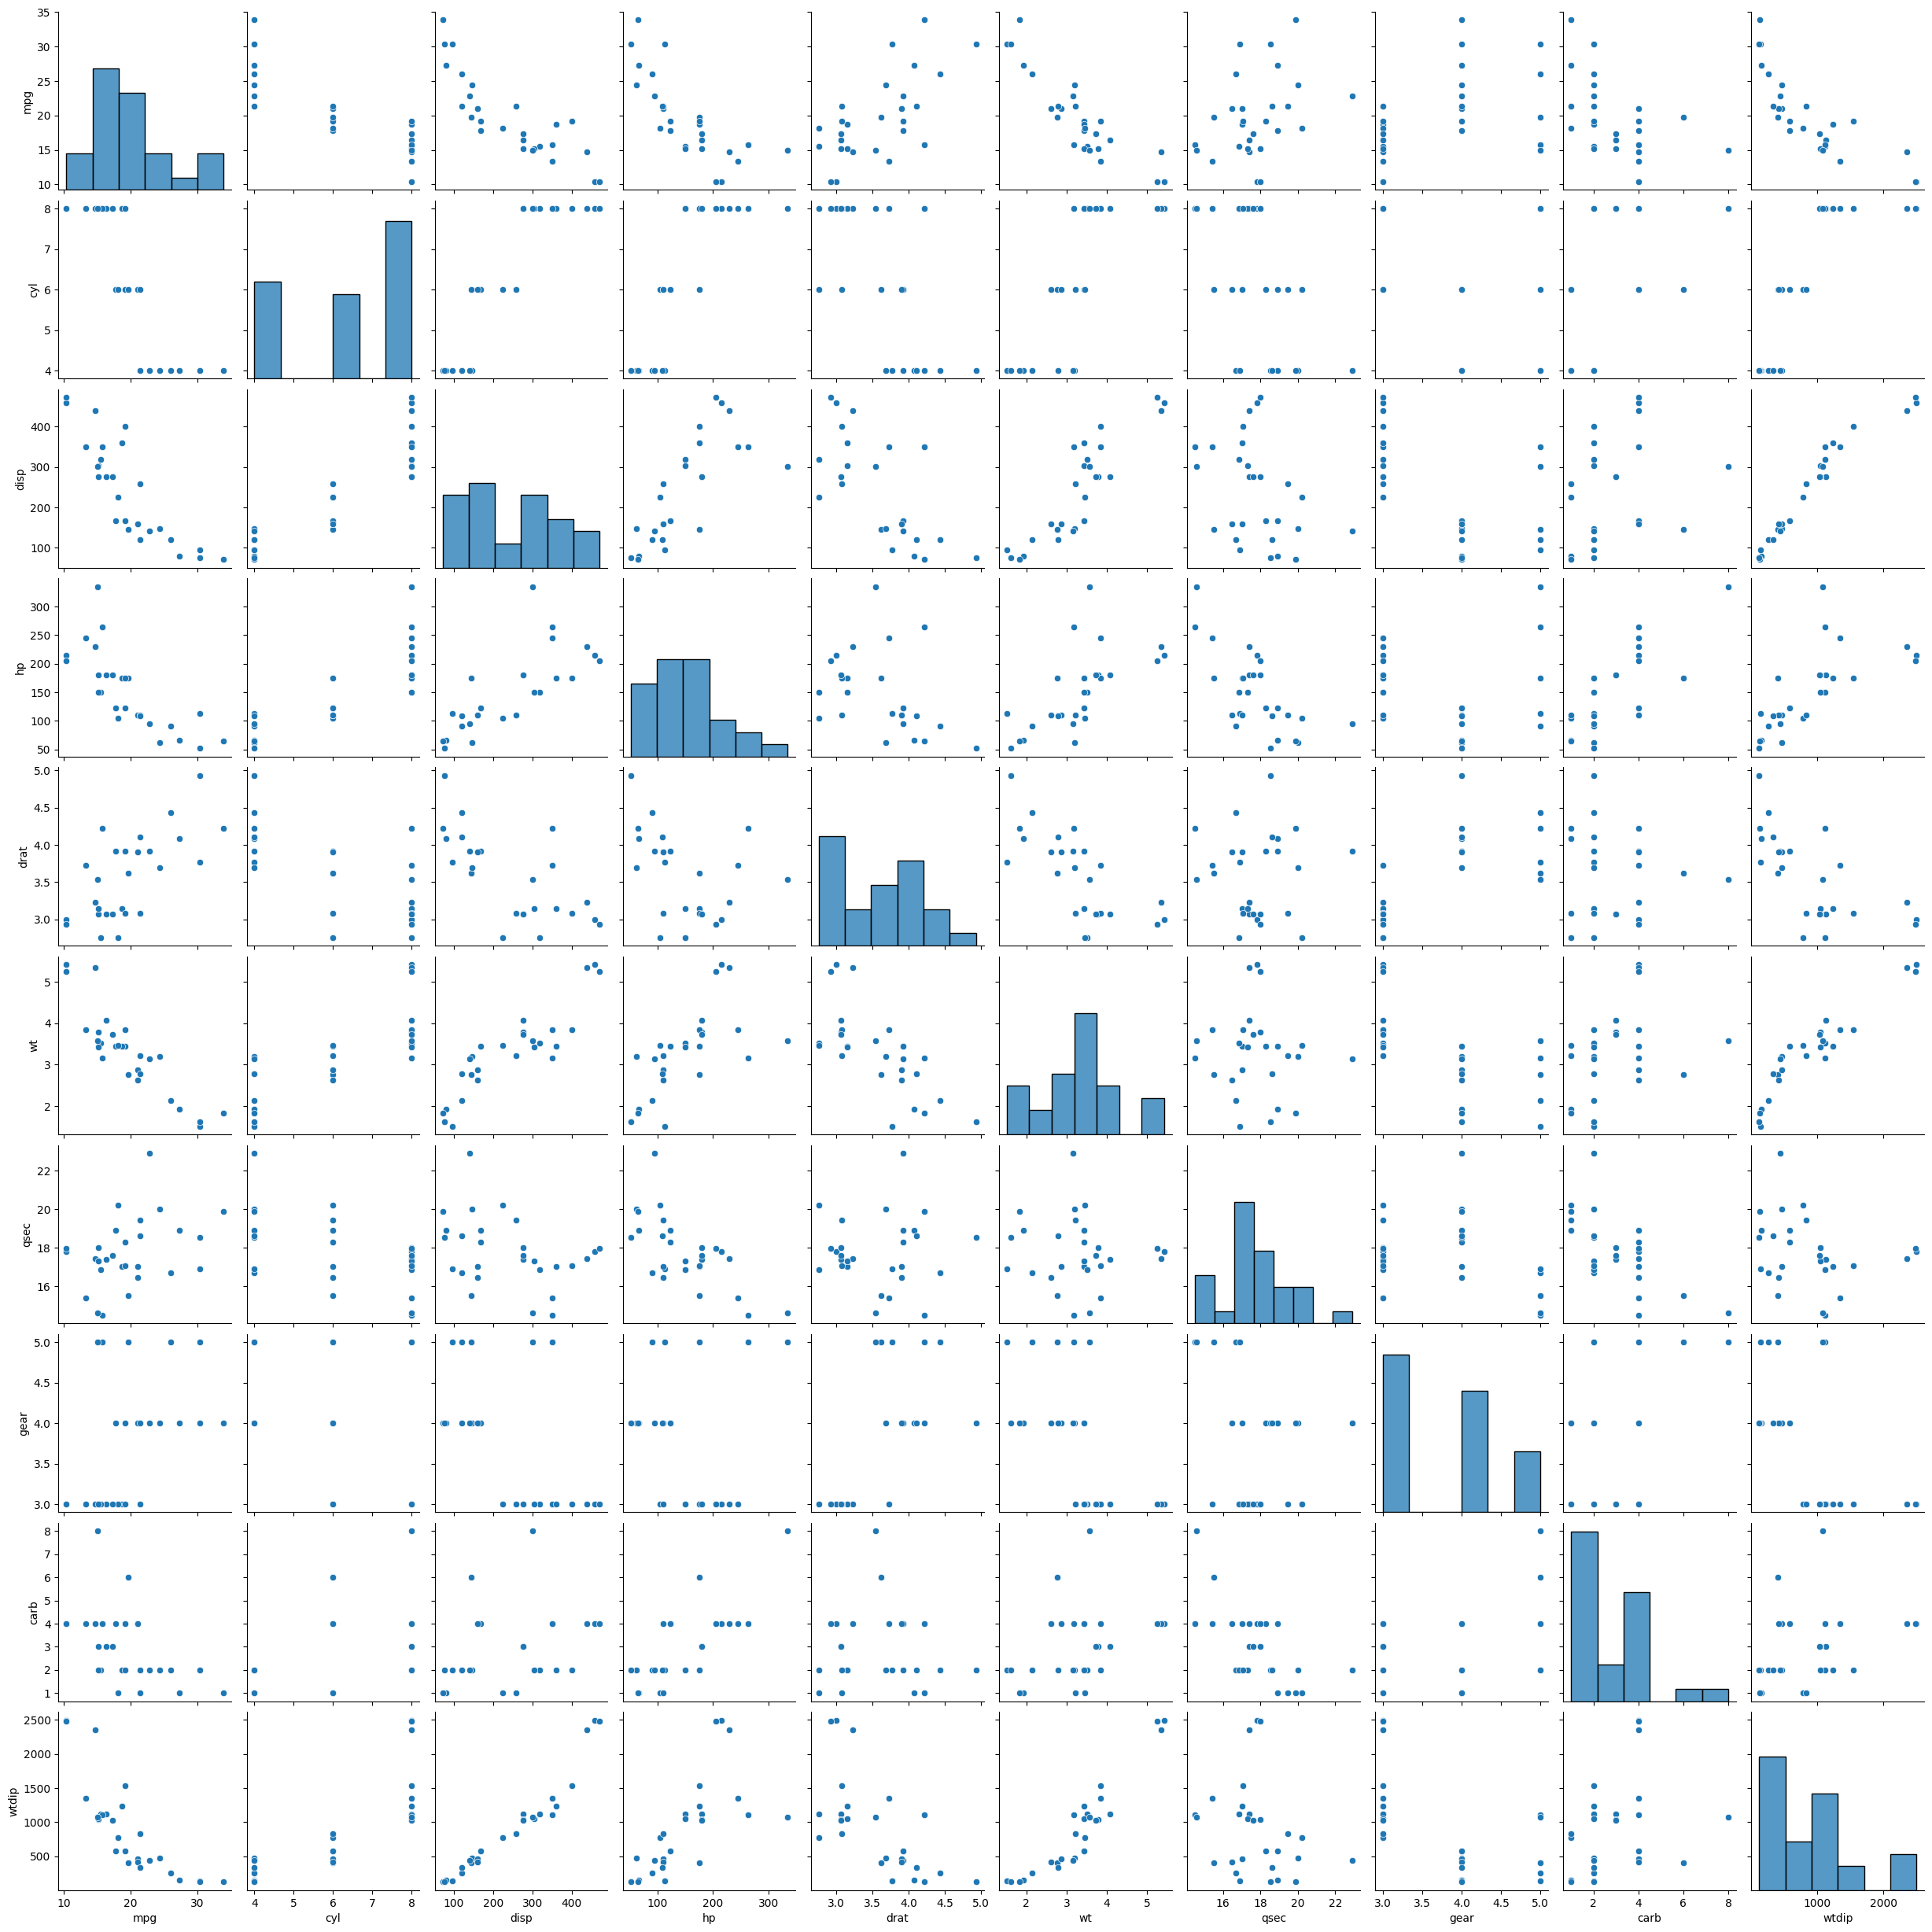

In [8]:
sns.pairplot(data=df_train)
plt.show()

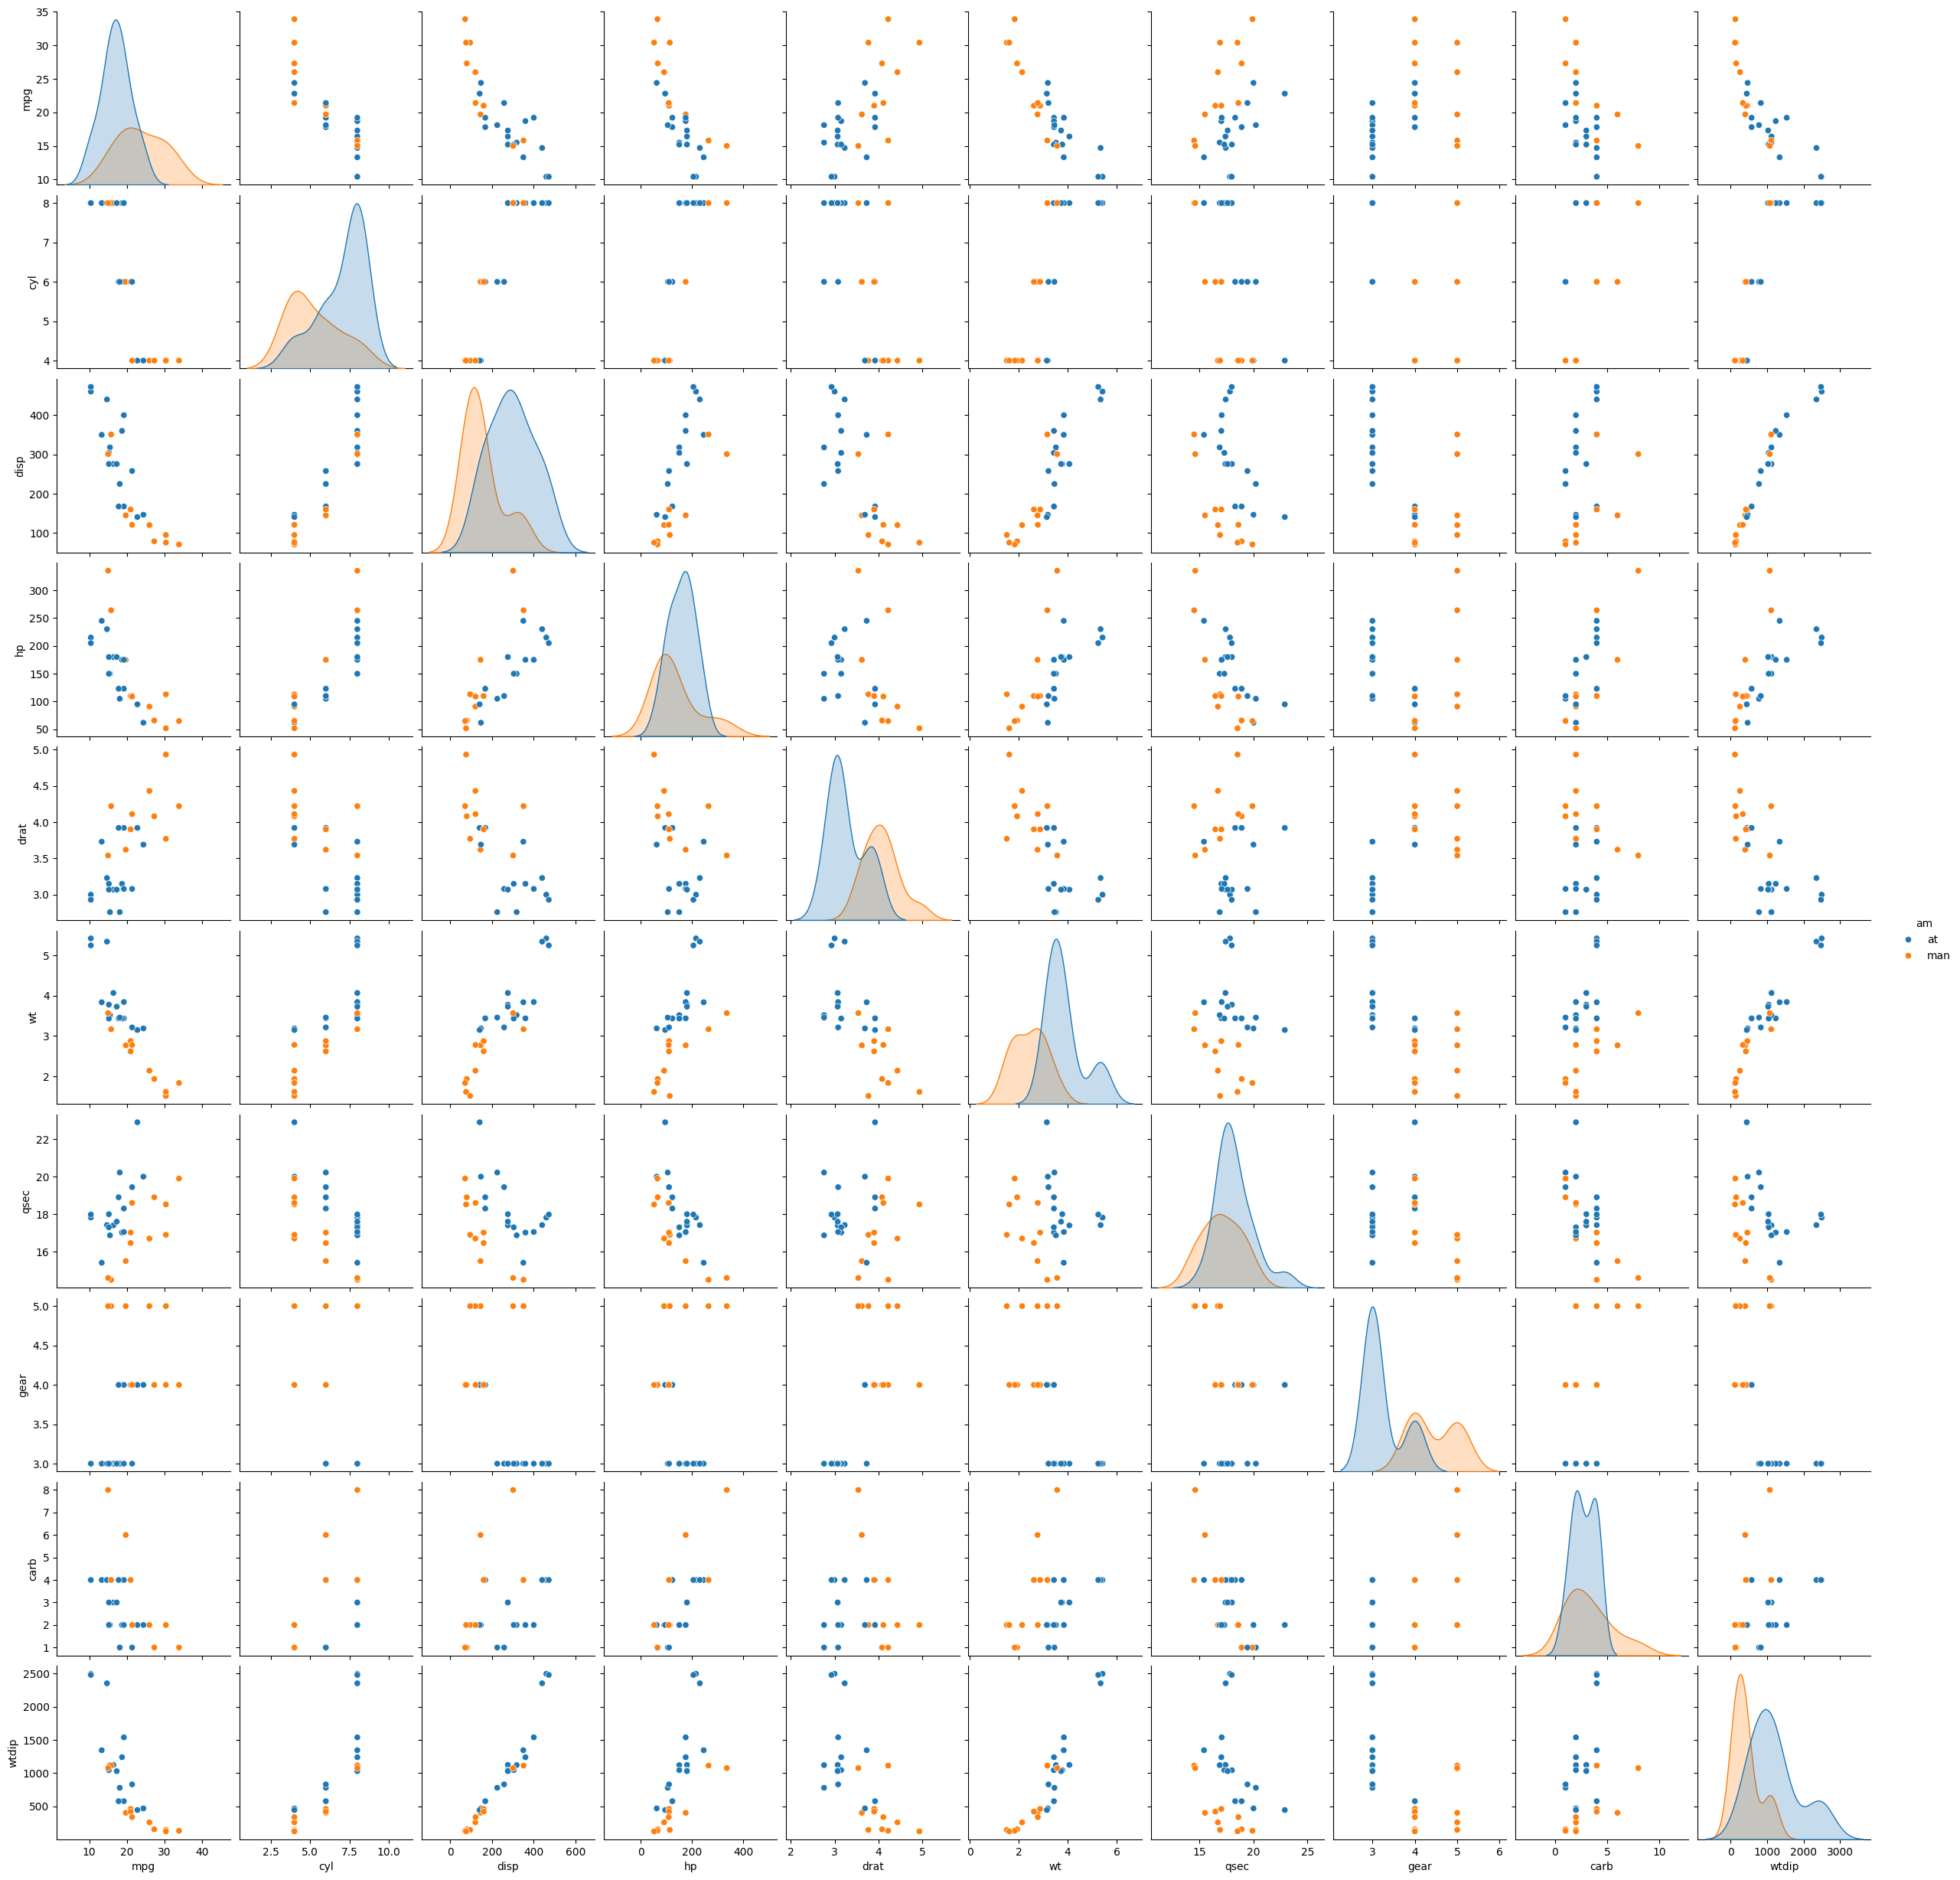

In [9]:
sns.pairplot(data=df_train, hue='am')
plt.show()

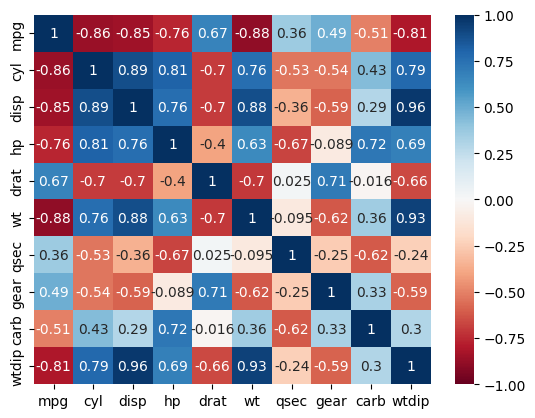

In [10]:
sns.heatmap(data=df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [11]:
X_train = df_train[['disp']].copy()
y_train = df_train['mpg'].copy()
X_test = df_test[['disp']].copy()
y_test = df_test['mpg'].copy()

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_hat = lr.predict(X_train)

In [14]:
print(f'MSE: {mean_squared_error(y_train,y_hat):.2f}')
print(f"Coefficient of determination: {r2_score(y_train,y_hat):.2f}")

MSE: 9.45
Coefficient of determination: 0.71


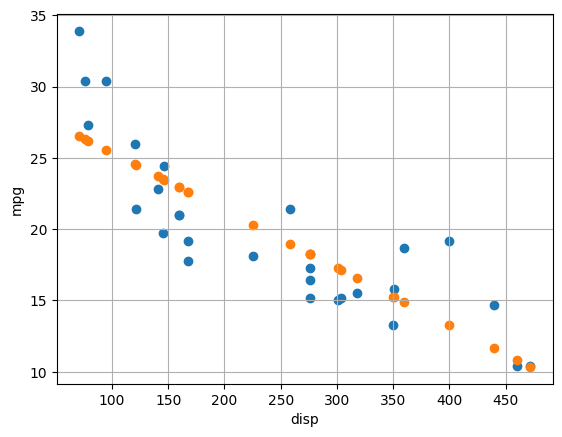

In [15]:
plt.scatter(df_train['disp'],df_train['mpg'])
plt.scatter(df_train['disp'],y_hat)
plt.xlabel('disp')
plt.ylabel('mpg')
plt.grid(True)
plt.show()

In [16]:
X_train = df_train[['disp','carb']].copy()
y_train = df_train['mpg'].copy()
X_test = df_test[['disp','carb']].copy()
y_test = df_test['mpg'].copy()

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_hat = lr.predict(X_train)

In [19]:
print(f'MSE: {mean_squared_error(y_train,y_hat):.2f}') # un MSE más alto indicaría peores predicciones y un MSE más bajo indicaría mejores predicciones.
print(f"Coefficient of determination: {r2_score(y_train,y_hat):.2f}")

MSE: 7.06
Coefficient of determination: 0.79
